# <center>Introduction to Model Selection Methods </center>
<br><br>
<center> Zhangyi Hu </center>
<center> Oct. 16, 2016</center>

# <center> Contents </center>

- Review on basic terminology of statistical learning 
- Motivation of model selection
- Four types of model selection criteria
    - In sample test error (Mallow's Cp)
    - Out of sample test error (CV, Bootstrap)
    - Information criterion (AIC)
    - Bayesian criterion (BIC)

# <center> Basic terminology of statistical learning </center>

###  Data = feature + response 

### Model  predicts response based on feature

### Data can be *Training* set or *Test* set 

### <center> Data = feature + response </center>
Other names for *feature*:
- regressor 
- predictor
- independent(input, explanatory) variable
- $X$

Other names for *response*:
- regressand
- dependent(output, explained) variable
- $Y$

### <center> Model  predicts response based on feature </center>
- Model is mathematically defined by a set of parameters $\{\theta_i\}$
  - Ture model: $\mathbf{y}=f_{\theta}\left(\mathbf{X}\right)+\mathbf{\varepsilon}$
  - Trained model:
$\hat{\mathbf{y}}=g_{\hat{\theta}}\left(\mathbf{X}\right)$

- The process of finding the value of parameters is called *Model Trainning*: 
$$\{\theta_{i}\}\rightarrow\{\hat{\theta}_{i}\}$$

- The process of choosing the set of parameters is called *Model Selection*: 
$$\{\hat{\theta}_{i}\}_{i=1}^{p}\mbox{ or }\{\hat{\theta}_{i}\}_{i=1}^{p+q}$$

### <center> Training set and Test set </center>
- Both are data, with feature and response
- Training set is used to train the model, i.e. obtain $\{\theta_i\}$
  - The difference between model prediction and response in the training set: **Training Error**

- Test set are used to evaluate the model
  - Test set are usually not available to the model designer
  - e.g. The the data provided by the end user of the trained model
  - The difference between prediction and response in the test set: **Test Error**
    - When the test set has the same features as training set but new observations of response: **In-sample Test Error**
    - When the test set has different feature: **Out-of-sample Test Error**

- Usually, the model designer will randomly put away part of available data and pretend he or she doesn't know it and later use it as test set

# <center> Motivation of model selection </center>
### Model, by definition, need to be relatively simple to be practical
### With no constraint on parameter space, a model can fit any thing

## <center>One extreme example</center>

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

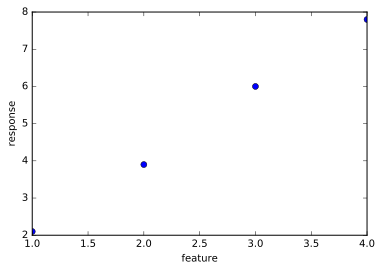

In [16]:
x = [1,2,3,4]
y = [2.1, 3.9, 6.0, 7.8]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o')
ax.set_xlabel('feature')
ax.set_ylabel('response')
plt.show()

<center> Is this a good model? </center>
<center> Its training error is zero! </center>
$y=\begin{cases}
2.1 & x=1\\
3.9 & x=2\\
6.0 & x=3\\
7.8 & x=4\\
x & \mbox{otherwise}
\end{cases}$

In [10]:
from IPython.core.display import HTML
HTML(filename='../slides.html')
